In [36]:
#Importing the libraries
from wordcloud import WordCloud
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhakti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Importing the cleaned file containing the text and label

In [2]:
import pandas as pd
file_contents=pd.read_csv("D:\\text file\\news.csv")
x=file_contents["title"]
y=file_contents["label"]

In [3]:
file_contents.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#Counting the REAL and FAKE news
for key,count in file_contents.label.value_counts().iteritems():
    print(f"{key}:\t{count}")
print(f"Total Records:\t{file_contents.shape[0]}")

REAL:	3171
FAKE:	3164
Total Records:	6335


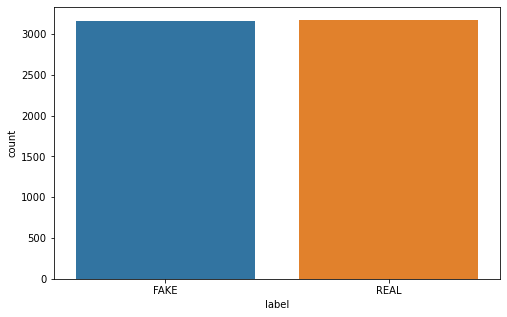

In [7]:
#Plotting the graph
plt.figure(figsize=(8,5))
sns.countplot("label", data=file_contents)
plt.show()

Making WordCloud of the textfile

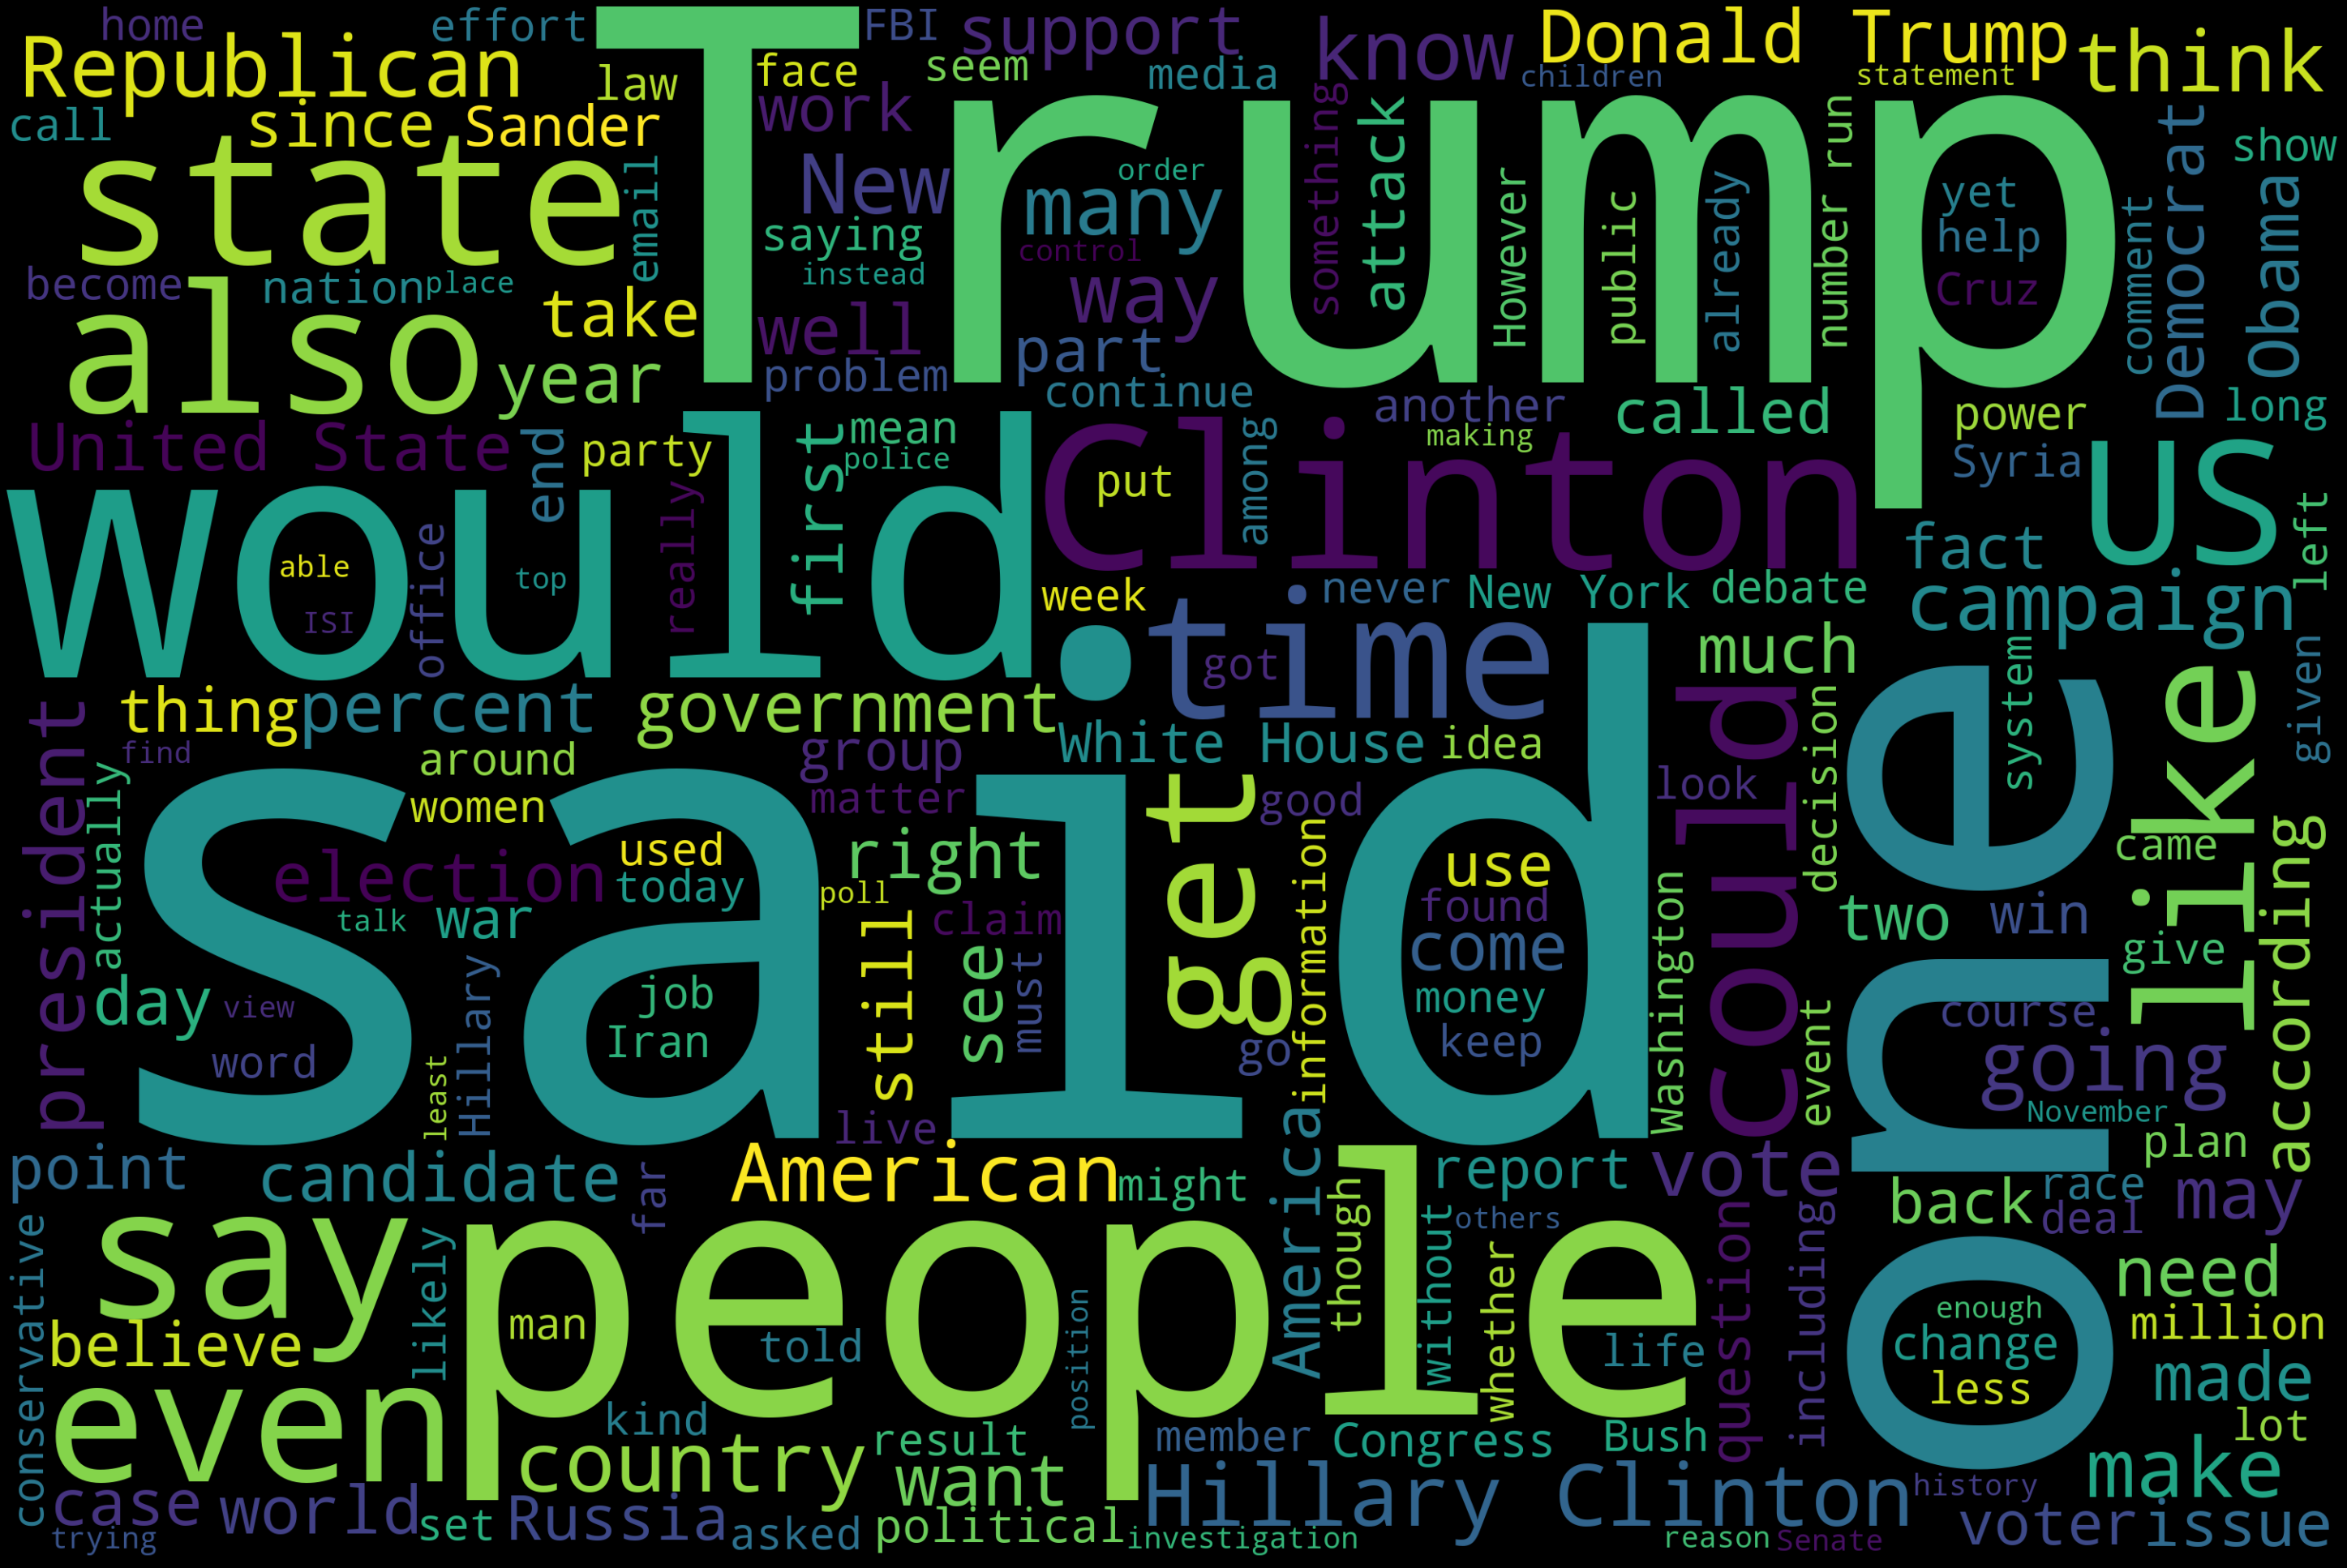

In [8]:
text = ''
for news in file_contents.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [9]:
file_contents.shape

(6335, 4)

In [10]:
file_contents.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [11]:
#Splitting the data into train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
#Transforming text to feature vectors
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [13]:
#Counting Accuracy using PassiveAggressiveClassifier Algorithm
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test, y_pred)
print(f"Accuracy:{round(score*100,2)}%")

Accuracy:76.8%


In [14]:
#Creating a pipeline that first creates list of words(removing stopwords) & then applies Multinomial Naive Bayes model
pipeline=Pipeline([('tfidf',TfidfVectorizer(stop_words='english')),
                   ('nbmodel', MultinomialNB())])

In [15]:
#Training the data
pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [16]:
#Calculating accuracy score
score=pipeline.score(x_test,y_test)
print("accuracy",score)

accuracy 0.8082083662194159


In [17]:
#Predicting the label for the test data
pred=pipeline.predict(x_test)

Checking performance of data

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        FAKE       0.84      0.75      0.79       621
        REAL       0.78      0.86      0.82       646

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



In [19]:
print(confusion_matrix(y_test,pred))

[[466 155]
 [ 88 558]]
